## Machine Learning 

### Rice + Maize - Drought Model - Word2Vec

In [ ]:
!pip install lazypredict

In [2]:
# Import Libs
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
rice_df = pd.read_excel('rice_word2vec_3mer_dataset.xlsx')
rice_df

,circName,stress,tissue,chr,start,end,strand,start_anno,wc_3mer_1,wc_3mer_2,...,wc_3mer_55,wc_3mer_56,wc_3mer_57,wc_3mer_58,wc_3mer_59,wc_3mer_60,wc_3mer_61,wc_3mer_62,wc_3mer_63,wc_3mer_64
0,osa-circ1-OS01T0723400,-,multipleTissue,1,30167620,30167771,+,"exon,CDS",-3.738741,8.954664,...,-25.198840,2.249939,-4.701558,-3.633969,5.212902,-6.579618,11.032136,-8.533007,-8.327910,18.141064
1,osa-circ2-OS03T0223400,-,multipleTissue,3,6461672,6462146,-,"exon,CDS",31.042567,37.664923,...,-27.264821,51.359450,-73.188428,-1.662928,56.565280,28.610637,80.878607,38.090248,-30.543510,28.859375
2,osa-circ3-OS11T0210300,-,multipleTissue,11,5715883,5716030,-,"exon,CDS",-31.307338,14.101101,...,-69.366830,1.113416,-42.689580,-6.150814,23.203639,-7.541412,-11.218056,-40.615067,16.391329,1.324206
3,osa-circ4-OS02T0200900,-,multipleTissue,2,5631023,5631244,-,"exon,CDS",15.773287,55.951050,...,42.391724,50.721551,-67.643923,-24.403869,41.171276,45.067768,9.704687,9.653121,7.829608,-11.254961
4,osa-circ5-OS05T0494800,-,multipleTissue,5,24302336,24302448,+,"exon,CDS",-44.379635,-33.514299,...,-75.243917,-36.308267,7.583992,-27.560256,-24.934966,-15.739278,9.237141,-16.380438,-18.462203,7.718794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63043,osa-circ63044--,-,multipleTissue,9,15388901,15389056,-,"exon,",1.187543,33.638602,...,39.581378,5.624058,-18.996478,-32.586105,-8.206610,38.324260,2.731934,28.181426,3.800943,-12.217631
63044,osa-circ63045--,-,multipleTissue,9,18686229,18686405,+,"exon,CDS",-80.622757,6.318129,...,22.650734,-26.579853,-16.502095,-137.357917,-76.090281,117.878950,-128.438327,-9.823361,4.179330,-43.925242
63045,osa-circ63046--,-,multipleTissue,1,21073588,21073752,+,"exon,",-74.383266,-15.111880,...,-16.439233,-7.612099,-29.730788,-98.997580,-40.800622,88.914954,-93.826379,-28.685970,-15.167838,-35.795096
63046,osa-circ63047--,-,multipleTissue,3,26460884,26461022,+,"exon,CDS",15.836808,18.807946,...,23.810030,14.158860,-25.809598,-1.792872,-4.828570,6.402574,10.700880,3.991035,-6.085688,4.940037


In [4]:
maize_df = pd.read_excel('maize_word2vec_3mer_dataset.xlsx')
maize_df

,circName,stress,tissue,chr,start,end,strand,start_anno,wc_3mer_1,wc_3mer_2,...,wc_3mer_55,wc_3mer_56,wc_3mer_57,wc_3mer_58,wc_3mer_59,wc_3mer_60,wc_3mer_61,wc_3mer_62,wc_3mer_63,wc_3mer_64
0,zma-circ1-Zm00001d002325,-,multipleTissue,2,10317309,10317467,-,"exon,CDS",-2.819397,-26.071322,...,-1.649599,31.579550,8.262636,-8.476553,-21.353326,-5.830368,5.679497,-0.869754,-16.990953,-28.061553
1,zma-circ2-Zm00001d038675,-,multipleTissue,6,162376852,162378246,+,"exon,CDS",38.139316,-33.984278,...,-276.418821,-19.796359,-14.883323,-210.640130,-108.069105,-196.095334,-8.178139,196.293086,-111.923786,-176.260473
2,zma-circ3-Zm00001d038163,-,multipleTissue,6,150032431,150032595,+,"exon,CDS",-13.009970,-12.990245,...,41.822434,8.608161,-6.166661,31.397092,23.119942,14.479912,7.400303,-15.383993,25.829718,-35.978360
3,zma-circ4-Zm00001d049552,-,multipleTissue,4,34381638,34381747,-,"exon,",-7.712050,-3.377060,...,-28.654313,9.646898,16.798625,4.431155,-22.220375,-12.460058,8.829987,17.305939,-19.056328,-6.713643
4,zma-circ5-Zm00001d032567,-,multipleTissue,1,230724608,230725226,-,"exon,CDS",5.437028,-13.467944,...,-27.083839,-10.496368,-3.498599,-47.558427,34.946736,-30.822783,-12.506350,11.305700,-11.058980,-78.504665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38780,zma-circ38781--,-,root,10,96969742,96969888,-,"exon,CDS",-13.972886,6.107950,...,98.429620,7.452953,-15.737801,35.920804,61.204687,48.885356,-12.690994,-36.205666,44.758745,-17.722664
38781,zma-circ38782--,-,leaf,4,244809483,244809674,-,intergenic,7.036017,-10.090989,...,24.790249,6.276686,-12.864078,-1.256257,42.178863,-4.007750,-10.729215,-5.812331,7.679475,-18.434670
38782,zma-circ38783--,-,shoot,1,38916899,38917325,+,intergenic,-18.672884,43.651235,...,172.084031,18.400802,-26.153603,36.820269,153.651124,101.715267,-52.398818,-47.916956,38.571516,-17.400118
38783,zma-circ38784--,-,root,1,205166872,205167268,-,intergenic,7.627427,-54.741109,...,87.106894,30.368255,-34.900771,53.611954,44.205673,-65.699111,30.057831,104.595740,81.229813,-104.068594


In [6]:
df = rice_df.append(maize_df, ignore_index = True)
df

<ipython-input-6-494fb249cdd2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = rice_df.append(maize_df, ignore_index = True)


,circName,stress,tissue,chr,start,end,strand,start_anno,wc_3mer_1,wc_3mer_2,...,wc_3mer_55,wc_3mer_56,wc_3mer_57,wc_3mer_58,wc_3mer_59,wc_3mer_60,wc_3mer_61,wc_3mer_62,wc_3mer_63,wc_3mer_64
0,osa-circ1-OS01T0723400,-,multipleTissue,1,30167620,30167771,+,"exon,CDS",-3.738741,8.954664,...,-25.198840,2.249939,-4.701558,-3.633969,5.212902,-6.579618,11.032136,-8.533007,-8.327910,18.141064
1,osa-circ2-OS03T0223400,-,multipleTissue,3,6461672,6462146,-,"exon,CDS",31.042567,37.664923,...,-27.264821,51.359450,-73.188428,-1.662928,56.565280,28.610637,80.878607,38.090248,-30.543510,28.859375
2,osa-circ3-OS11T0210300,-,multipleTissue,11,5715883,5716030,-,"exon,CDS",-31.307338,14.101101,...,-69.366830,1.113416,-42.689580,-6.150814,23.203639,-7.541412,-11.218056,-40.615067,16.391329,1.324206
3,osa-circ4-OS02T0200900,-,multipleTissue,2,5631023,5631244,-,"exon,CDS",15.773287,55.951050,...,42.391724,50.721551,-67.643923,-24.403869,41.171276,45.067768,9.704687,9.653121,7.829608,-11.254961
4,osa-circ5-OS05T0494800,-,multipleTissue,5,24302336,24302448,+,"exon,CDS",-44.379635,-33.514299,...,-75.243917,-36.308267,7.583992,-27.560256,-24.934966,-15.739278,9.237141,-16.380438,-18.462203,7.718794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101828,zma-circ38781--,-,root,10,96969742,96969888,-,"exon,CDS",-13.972886,6.107950,...,98.429620,7.452953,-15.737801,35.920804,61.204687,48.885356,-12.690994,-36.205666,44.758745,-17.722664
101829,zma-circ38782--,-,leaf,4,244809483,244809674,-,intergenic,7.036017,-10.090989,...,24.790249,6.276686,-12.864078,-1.256257,42.178863,-4.007750,-10.729215,-5.812331,7.679475,-18.434670
101830,zma-circ38783--,-,shoot,1,38916899,38917325,+,intergenic,-18.672884,43.651235,...,172.084031,18.400802,-26.153603,36.820269,153.651124,101.715267,-52.398818,-47.916956,38.571516,-17.400118
101831,zma-circ38784--,-,root,1,205166872,205167268,-,intergenic,7.627427,-54.741109,...,87.106894,30.368255,-34.900771,53.611954,44.205673,-65.699111,30.057831,104.595740,81.229813,-104.068594


In [7]:
# Select control and drought condition
df_drought = df.query('stress == "-" or stress == "drought"').replace('-', 0).replace('drought', 1)
df_drought.head()

,circName,stress,tissue,chr,start,end,strand,start_anno,wc_3mer_1,wc_3mer_2,...,wc_3mer_55,wc_3mer_56,wc_3mer_57,wc_3mer_58,wc_3mer_59,wc_3mer_60,wc_3mer_61,wc_3mer_62,wc_3mer_63,wc_3mer_64
0,osa-circ1-OS01T0723400,0,multipleTissue,1,30167620,30167771,+,"exon,CDS",-3.738741,8.954664,...,-25.198840,2.249939,-4.701558,-3.633969,5.212902,-6.579618,11.032136,-8.533007,-8.327910,18.141064
1,osa-circ2-OS03T0223400,0,multipleTissue,3,6461672,6462146,0,"exon,CDS",31.042567,37.664923,...,-27.264821,51.359450,-73.188428,-1.662928,56.565280,28.610637,80.878607,38.090248,-30.543510,28.859375
2,osa-circ3-OS11T0210300,0,multipleTissue,11,5715883,5716030,0,"exon,CDS",-31.307338,14.101101,...,-69.366830,1.113416,-42.689580,-6.150814,23.203639,-7.541412,-11.218056,-40.615067,16.391329,1.324206
3,osa-circ4-OS02T0200900,0,multipleTissue,2,5631023,5631244,0,"exon,CDS",15.773287,55.951050,...,42.391724,50.721551,-67.643923,-24.403869,41.171276,45.067768,9.704687,9.653121,7.829608,-11.254961
4,osa-circ5-OS05T0494800,0,multipleTissue,5,24302336,24302448,+,"exon,CDS",-44.379635,-33.514299,...,-75.243917,-36.308267,7.583992,-27.560256,-24.934966,-15.739278,9.237141,-16.380438,-18.462203,7.718794


In [8]:
df_drought['start_anno'] = df_drought['start_anno'].replace('exon,CDS', 'exon,')
df_drought['start_anno'].unique()

array(['exon,', 'intron', 'intergenic'], dtype=object)

In [11]:
df_drought = pd.concat([df_drought, pd.get_dummies(df_drought['start_anno'])], axis=1) 

In [12]:
# Define X and y (target) variables
X = df_drought.drop(['chr','stress', 'circName', 'end', 'start', 'start_anno', 'strand', 'tissue'], axis=1)
y = df_drought['stress']

In [13]:
X.head(2)

,wc_3mer_1,wc_3mer_2,wc_3mer_3,wc_3mer_4,wc_3mer_5,wc_3mer_6,wc_3mer_7,wc_3mer_8,wc_3mer_9,wc_3mer_10,...,wc_3mer_58,wc_3mer_59,wc_3mer_60,wc_3mer_61,wc_3mer_62,wc_3mer_63,wc_3mer_64,"exon,",intergenic,intron
0,-3.738741,8.954664,0.703204,-7.427550,9.996643,-0.181532,18.598464,-34.975266,-1.800704,10.088900,...,-3.633969,5.212902,-6.579618,11.032136,-8.533007,-8.32791,18.141064,1,0,0
1,31.042567,37.664923,95.821671,-13.835744,-44.356329,15.314592,45.651881,-14.309955,-16.547858,-11.756102,...,-1.662928,56.565280,28.610637,80.878607,38.090248,-30.54351,28.859375,1,0,0


In [14]:
y.value_counts()

0    70996
1    12030
Name: stress, dtype: int64

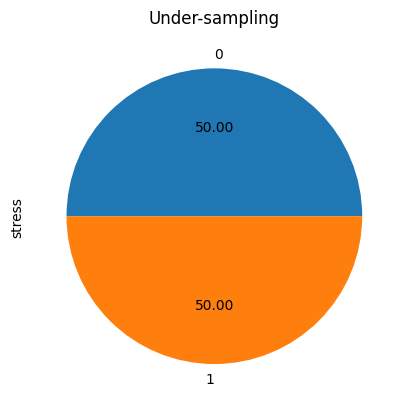

In [15]:
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(sampling_strategy=1) 

X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [16]:
y_res.value_counts()

0    12030
1    12030
Name: stress, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20)

In [18]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [04:41<00:00,  9.70s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.83,0.83,0.83,0.83,24.90
ExtraTreesClassifier,0.83,0.83,0.83,0.83,5.53
LGBMClassifier,0.83,0.83,0.83,0.83,1.56
AdaBoostClassifier,0.83,0.83,0.83,0.83,13.56
NuSVC,0.82,0.82,0.82,0.82,48.73
LogisticRegression,0.82,0.82,0.82,0.82,0.45
SVC,0.82,0.82,0.82,0.82,31.05
XGBClassifier,0.82,0.82,0.82,0.82,28.18
CalibratedClassifierCV,0.81,0.81,0.81,0.81,38.54
